In [1]:
import sys
from pathlib import Path

repo_root = Path.cwd().resolve().parents[1]  # …/collision_of_two_bodies
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))


In [2]:
from two_body.core import Config, set_global_seeds
from two_body.core.telemetry import setup_logger
from two_body.logic.controller import ContinuousOptimizationController
#from two_body.presentation.visualization import Visualizer
from two_body.simulation.rebound_adapter import ReboundSim
from two_body.presentation.triDTry import Visualizer
import numpy as np


In [4]:
def build_config(overrides=None):
    base = Config()
    if overrides:
        base = Config(**overrides)
    set_global_seeds(base.seed)
    return base

import logging

def run_case(case_name, overrides=None, verbose=True):
    cfg = build_config(overrides)
    base_logger = setup_logger()
    logger = logging.getLogger(f"case_{case_name.lower().replace(' ', '_')}")
    logger.setLevel(base_logger.level)
    if not logger.handlers:
        for h in base_logger.handlers:
            logger.addHandler(h)

    controller = ContinuousOptimizationController(cfg, logger=logger if verbose else None)
    result = controller.run()
    if verbose:
        logger.info("→ %s | mejor λ ≈ %.4f", case_name, -(result["best"]["lambda"] or float("nan")))
        print(result)
    return cfg, result


def visualize_best(cfg, result, horizon="short", show=False):
    best = result.get("best") or {}
    m1, m2 = best.get("m1"), best.get("m2")
    if m1 is None or m2 is None:
        print("Sin candidato válido para visualizar.")
        return

    masses = (m1, m2)
    r0 = tuple(cfg.r0[i] for i in range(len(masses)))
    v0 = tuple(cfg.v0[i] for i in range(len(masses)))

    sim_builder = ReboundSim(G=cfg.G, integrator=cfg.integrator)
    sim = sim_builder.setup_simulation(masses=masses, r0=r0, v0=v0)
    t_end = cfg.t_end_short if horizon == "short" else cfg.t_end_long
    traj = sim_builder.integrate(sim, t_end=t_end, dt=cfg.dt)
    
    xyz_tracks = [traj[:, idx, :3] for idx in range(traj.shape[1])]
    
    viz = Visualizer(headless=False)
    
    viz.animate_3d(
        trajectories=xyz_tracks,
        title=f"Trayectorias 3D {best['m1']:.3f}, {best['m2']:.3f}",
        interval_ms=50, 
        total_frames=len(xyz_tracks[0]) 
    )
    
    return xyz_tracks


In [5]:
cases = {
    "Caso A (baseline)": {},
    "Caso B (semilla distinta)": {"seed": 123},
    "Caso C (búsqueda acotada)": {
        "m1_bounds": (0.8, 1.2),
        "m2_bounds": (0.8, 1.2),
        "local_radius": 0.05,
    },
}


In [6]:
results = {}
for name, overrides in cases.items():
    cfg, result = run_case(name, overrides=overrides)
    results[name] = (cfg, result)


[2025-10-21 21:05:02,986] INFO - Stagnation detected; reseeding around best candidate.
[2025-10-21 21:05:05,486] INFO - Stagnation detected; reseeding around best candidate.
[2025-10-21 21:05:06,886] INFO - Stagnation detected; reseeding around best candidate.
[2025-10-21 21:05:08,102] INFO - Stagnation detected; reseeding around best candidate.
[2025-10-21 21:05:09,352] INFO - Stagnation detected; reseeding around best candidate.
[2025-10-21 21:05:10,552] INFO - Stagnation detected; reseeding around best candidate.
[2025-10-21 21:05:12,002] INFO - Stagnation detected; reseeding around best candidate.
[2025-10-21 21:05:13,220] INFO - Stagnation detected; reseeding around best candidate.
[2025-10-21 21:05:13,935] INFO - → Caso A (baseline) | mejor λ ≈ 4.9456


{'status': 'completed', 'best': {'m1': 8.328788345829098, 'm2': 4.319153583789711, 'lambda': -4.945643314212515, 'fitness': 4.945643314212515}, 'evals': 3600, 'epochs': 50}


[2025-10-21 21:05:15,751] INFO - Stagnation detected; reseeding around best candidate.
[2025-10-21 21:05:17,251] INFO - Stagnation detected; reseeding around best candidate.
[2025-10-21 21:05:18,434] INFO - Stagnation detected; reseeding around best candidate.
[2025-10-21 21:05:19,684] INFO - Stagnation detected; reseeding around best candidate.
[2025-10-21 21:05:20,918] INFO - Stagnation detected; reseeding around best candidate.
[2025-10-21 21:05:22,154] INFO - Stagnation detected; reseeding around best candidate.
[2025-10-21 21:05:23,567] INFO - Stagnation detected; reseeding around best candidate.
[2025-10-21 21:05:24,767] INFO - Stagnation detected; reseeding around best candidate.
[2025-10-21 21:05:25,967] INFO - Stagnation detected; reseeding around best candidate.
[2025-10-21 21:05:26,686] INFO - → Caso B (semilla distinta) | mejor λ ≈ 4.9431


{'status': 'completed', 'best': {'m1': 6.696718221156337, 'm2': 5.950866835960592, 'lambda': -4.943071401001741, 'fitness': 4.943071401001741}, 'evals': 3600, 'epochs': 50}


[2025-10-21 21:05:28,450] INFO - Stagnation detected; reseeding around best candidate.
[2025-10-21 21:05:29,683] INFO - Stagnation detected; reseeding around best candidate.
[2025-10-21 21:05:30,852] INFO - Stagnation detected; reseeding around best candidate.
[2025-10-21 21:05:32,002] INFO - Stagnation detected; reseeding around best candidate.
[2025-10-21 21:05:33,300] INFO - Stagnation detected; reseeding around best candidate.
[2025-10-21 21:05:34,616] INFO - Stagnation detected; reseeding around best candidate.
[2025-10-21 21:05:35,799] INFO - Stagnation detected; reseeding around best candidate.
[2025-10-21 21:05:36,969] INFO - Stagnation detected; reseeding around best candidate.
[2025-10-21 21:05:38,135] INFO - Stagnation detected; reseeding around best candidate.
[2025-10-21 21:05:39,366] INFO - → Caso C (búsqueda acotada) | mejor λ ≈ 0.0002


{'status': 'completed', 'best': {'m1': 0.8872364607396435, 'm2': 0.9248012708557001, 'lambda': -0.00024405227806559865, 'fitness': 0.00024405227806559865}, 'evals': 3600, 'epochs': 50}


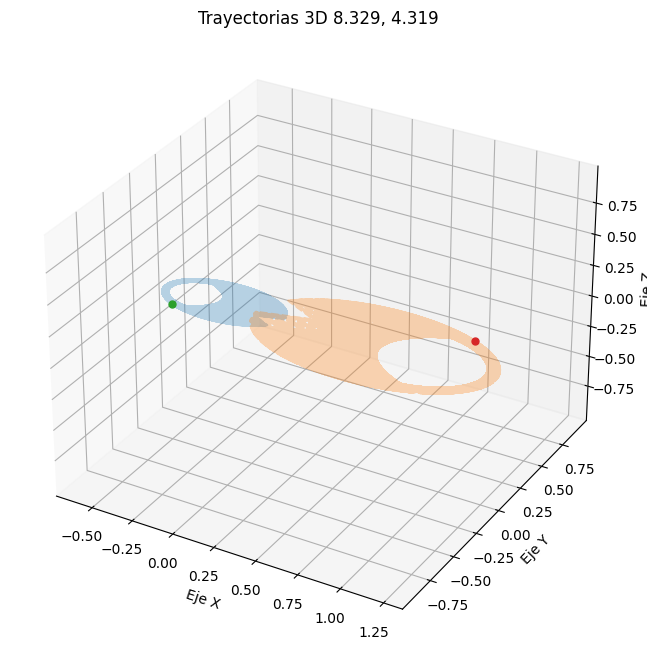

c:\Users\52551\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [ ]:

cfg_A, result_A = results["Caso A (baseline)"]

trayectorias_3d = visualize_best(cfg_A, result_A, horizon="long")

Visualizando Caso A (baseline)


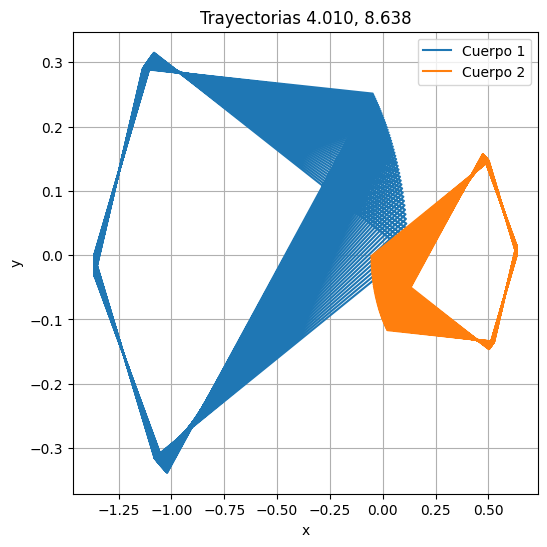

Visualizando Caso B (semilla distinta)


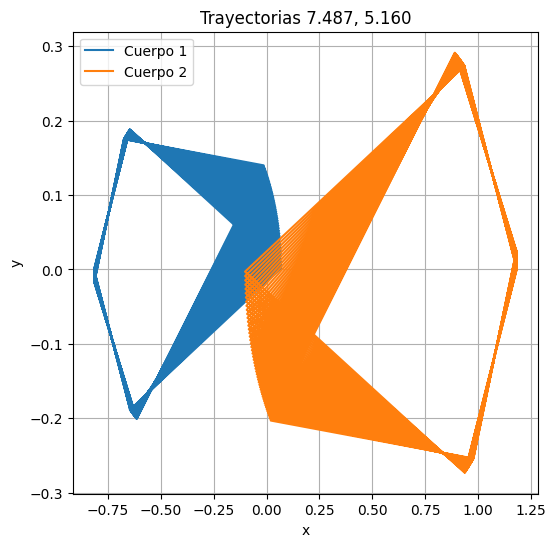

Visualizando Caso C (búsqueda acotada)


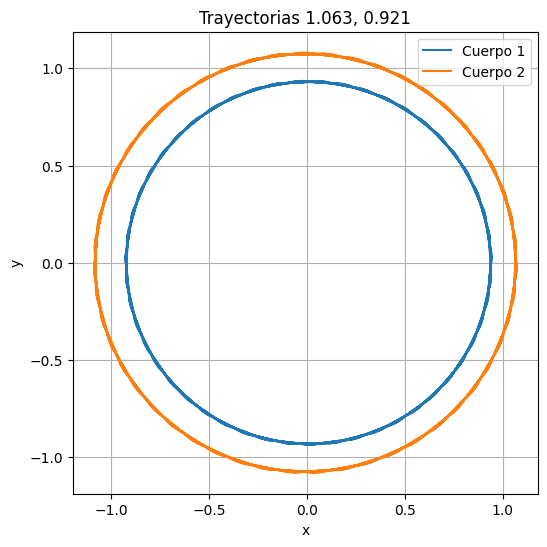

In [7]:
for name, (cfg, result) in results.items():
    print(f"Visualizando {name}")
    visualize_best(cfg, result, horizon="short", show=True)
